# Data Visualization with Python Final_Assignment

A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic:**Very Interested**, **Somewhat interested**, and **Not interested. 2,233** respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link:https://cocl.us/datascience_survey_data

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas **read_csv** method to read the csv file into a pandas dataframe, that looks like the following:


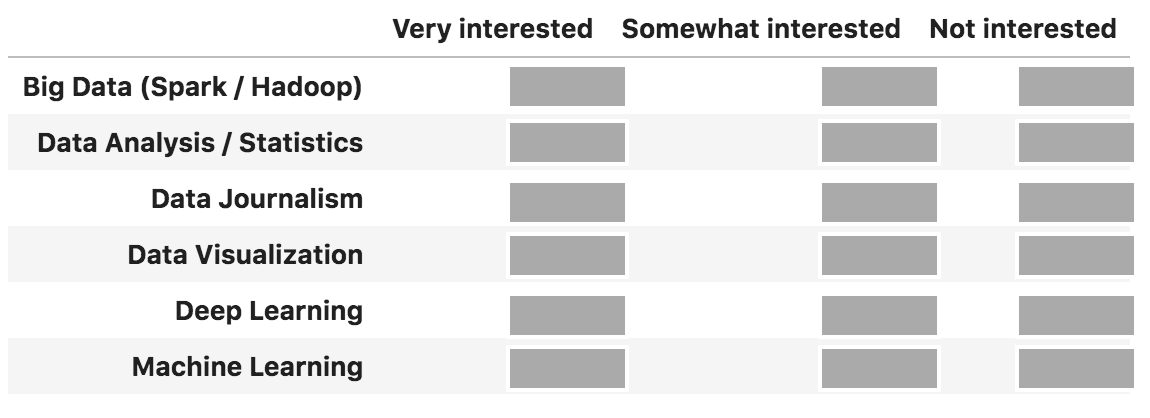




In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
# import liberies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# load dataset and display 
df_survey = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


Use the artist layer of Matplotlib to replicate the bar chart below to visualize the **percentage** of the respondents' interest in the different data science topics surveyed.

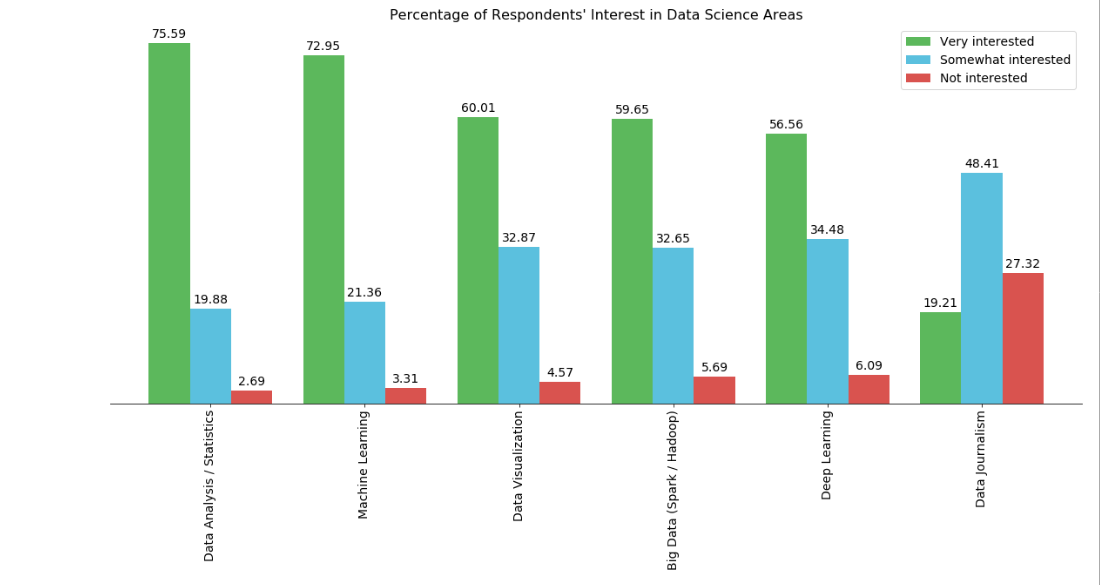


To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of **Very interested**.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
3. As for the chart:
- use a figure size of (20, 8),
- bar width of 0.8,
- use color #5cb85c for the **Very interested** bars, color #5bc0de for the **Somewhat interested** bars, and color #d9534f for the **Not - interested** bars,
- use font size 14 for the bar labels, percentages, and legend,
- use font size 16 for the title, and,
- display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [3]:
# Sorting the values 
df_survey1= df_survey.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# Taking the percentage of the responses and rounding it to 2 decimal places 
df_survey1 = round((df_survey/2233)*100,2)

# View top 5 rows of the data 
df_survey1.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


In [4]:
# prepare dataset

#Sort the dataframe in descending order of **Very interested**
df_survey_percent = df_survey.sort_values('Very interested', ascending = False)

#Convert the numbers into percentages of the total number of respondents
df_survey_percent = df_survey_percent / 2233 * 100
#Round percentages to 2 decimal
df_survey_percent.round(2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


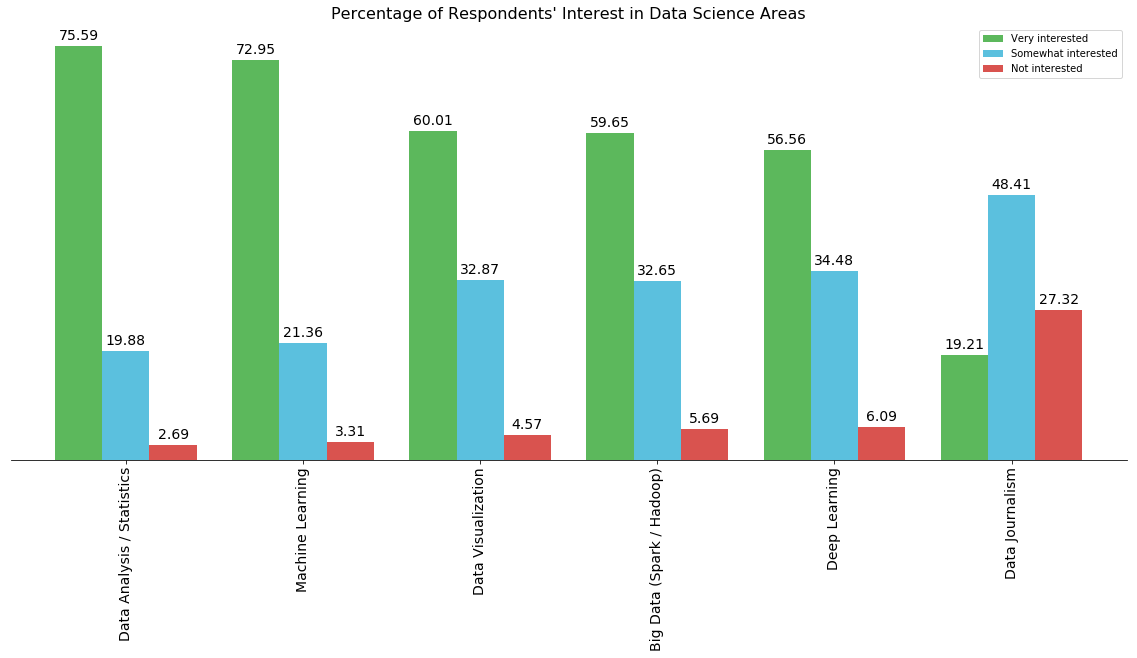

In [5]:
#Create the BarChart

color_list = ['#5cb85c' ,'#5bc0de', '#d9534f']

# artist layer bar chart
ax = df_survey_percent.plot( kind = 'bar',
                            figsize = (20,8),
                            width = 0.8,
                            color = color_list,
                            fontsize = 14,
                            edgecolor = None
                           
                           )

# Set the title
ax.set_title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)
#Set legend
#ax.legend(fontsize= 14)

#Remove unwanted border
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

ax.get_yaxis().set_visible(False)

# show the percentage on chart 
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x() + p.get_width()/2 , p.get_height()),
                ha ='center',
                va = 'center',
                xytext =(0,10),
                textcoords = 'offset points',
                fontsize = 14     
                                
               )


Create a Choropleth map to visualize crime in San Francisco.

Before start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset,  will find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10. Tenderloin.


cisco dataset,  can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

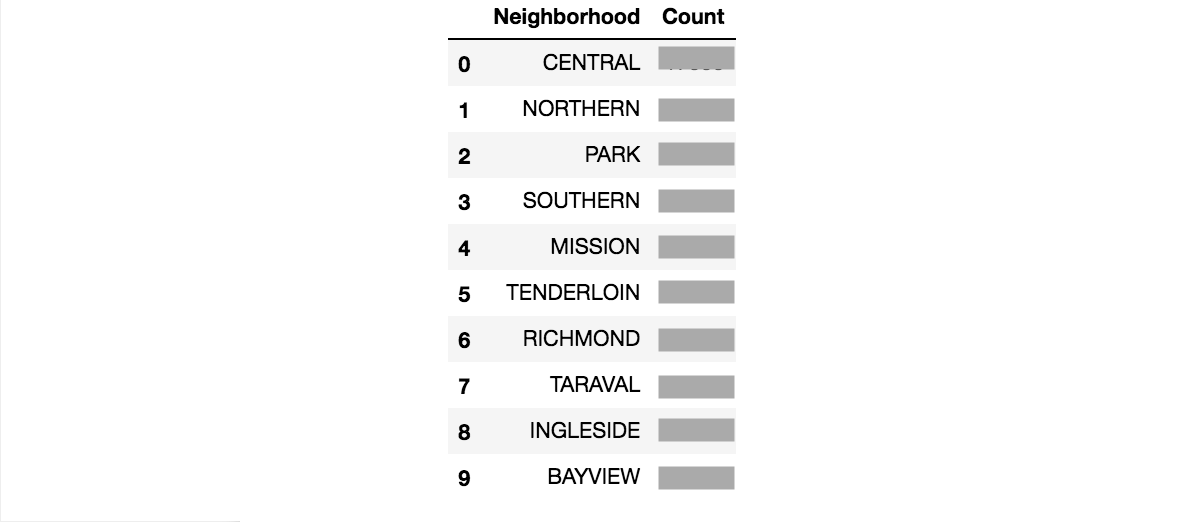

In [6]:
# read csv file as dataframe and display 
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [7]:
#count the incidents by neighborhod  district
df_sf_nh =df_incidents.groupby(['PdDistrict']).count()

# Remove Unwanted columns
df_sf_nh.drop(df_sf_nh.columns.difference(['PdDistrict','IncidntNum']), axis = 1, inplace = True )

# set the index as per our order
df_sf_nh =df_sf_nh.reindex(['CENTRAL', 'NORTHERN', 'PARK', 'SOUTHERN', 'MISSION', 'TENDERLOIN', 'RICHMOND', 'TARAVAL', 'INGLESIDE', 'BAYVIEW'])

# Resetting the index
df_sf_nh = df_sf_nh.reset_index()

# rename column
df_sf_nh.rename(columns = {'PdDistrict':'Neighborhood','IncidntNum':'Count'}, inplace = True)

#display dataFrame 
df_sf_nh



,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


Now  ready to proceed with creating the Choropleth map.

For the Choropleth, will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

- it is centred around San Francisco,
- you use a zoom level of 12,
- you use fill_color = 'YlOrRd',
- you define fill_opacity = 0.7,
- you define line_opacity=0.2, and,
- you define a legend and use the default **threshold scale**.
- If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

**Install folium **

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

# All requested packages already installed.



In [9]:
# import folium for map 

import folium 

#raed the json file of san francisco 
neighbor_geo = r'https://cocl.us/sanfran_geojson'

# latitude nad longtitude of san francisco 
sf_latitude = 37.77
sf_longtitude = -122.42

#craete map
sanf_map = folium.Map(location =[sf_latitude,sf_longtitude], zoom_start =12)

#display map
sanf_map

proceed with creating the **Choropleth map**

In [10]:
# crate Choropleth map and display 
sanf_map.choropleth( geo_data =neighbor_geo,
                  data = df_sf_nh,
                  columns = ['Neighborhood','Count'],
                  key_on = 'feature.properties.DISTRICT',
                  fill_color = 'YlOrRd',
                  fill_opacity = 0.7,
                  line_opacity=0.2,
                legend_name='Crime Rate in San Francisco'
            
                  
                  
)

sanf_map

